## Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pylab
import scipy.stats as stat
from scipy.stats import ttest_ind, chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols
from category_encoders import TargetEncoder
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import os

### Loading Data

In [2]:
os.chdir("C:\\Users\\Nilesh\\Documents\\GitHub\\Practical\\")
df = pd.read_csv("Social_Network_Ads.csv")
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


### Idendification of Variables

In [3]:
df.shape

(400, 3)

In [4]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


### Spliting Dependent and Independent Variable

In [6]:
df_X = df.iloc[:,:-1]
df_Y = df.iloc[:,-1]

In [7]:
df_X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [8]:
df_Y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

### Scaling Dataset

In [9]:
scaler = StandardScaler()
df_X_scaled = pd.DataFrame(scaler.fit_transform(df_X),columns=df_X.columns)

In [11]:
df_X_scaled

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751
...,...,...
395,0.797057,-0.844019
396,1.274623,-1.372587
397,1.179110,-1.460681
398,-0.158074,-1.078938


In [13]:
X=df_X_scaled
Y=df_Y

### Train Test Split

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, shuffle=True, random_state=0)

### Creating Logistic Regression Model

In [15]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=16)
lr.fit(X_train, Y_train)
Y_pred = lr.predict(X_test)
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print("-"*70)
print("Report")
print("-"*70)
print("Confusion Matrix:")
print(str(confusion_matrix))
target_names = ['without diabetes', 'with diabetes']
acc=(confusion_matrix[0][0] + confusion_matrix[1][1])/(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[1][0]+confusion_matrix[1][1])
print("Accuracy by confusion matrix: "+str(acc))
print("\n")
print(classification_report(Y_test, Y_pred, target_names=target_names))
print("-"*70)

----------------------------------------------------------------------
Report
----------------------------------------------------------------------
Confusion Matrix:
[[57  1]
 [ 5 17]]
Accuracy by confusion matrix: 0.925


                  precision    recall  f1-score   support

without diabetes       0.92      0.98      0.95        58
   with diabetes       0.94      0.77      0.85        22

        accuracy                           0.93        80
       macro avg       0.93      0.88      0.90        80
    weighted avg       0.93      0.93      0.92        80

----------------------------------------------------------------------


### Evaluatng Results

In [16]:
Y_pred_total = lr.predict(X)

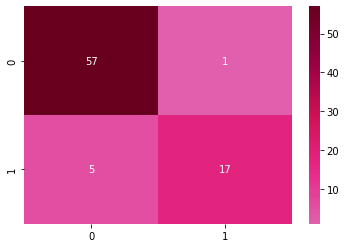

In [17]:
dataplot = sns.heatmap(confusion_matrix, cmap='PuRd', annot=True, center=0)

In [19]:
Y_pred = pd.DataFrame(Y_pred_total, columns = ['Y_pred'])
df_results = pd.concat([df, Y_pred], axis=1)
df_results

,Age,EstimatedSalary,Purchased,Y_pred
0,19,19000,0,0
1,35,20000,0,0
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,0
...,...,...,...,...
395,46,41000,1,0
396,51,23000,1,1
397,50,20000,1,0
398,36,33000,0,0


### Visualizing Results

<AxesSubplot:title={'center':'Predicted'}, xlabel='Age', ylabel='EstimatedSalary'>

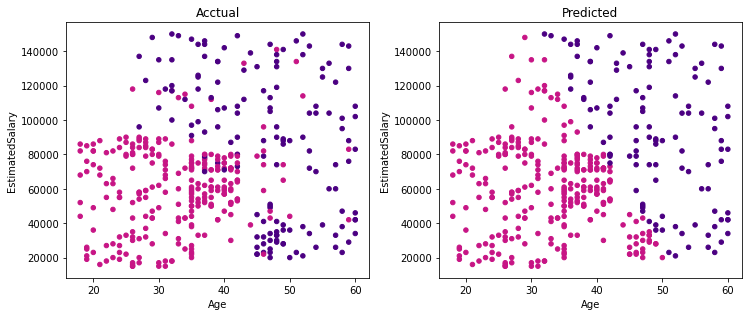

In [20]:
plt.rcParams["figure.figsize"] = [10.50, 4.50]
plt.rcParams["figure.autolayout"] = True
figure, axis = plt.subplots(1, 2)

colors = {0:'MEDIUMVIOLETRED', 1:'INDIGO'}
 
df_results.plot.scatter("Age","EstimatedSalary",title="Acctual",ax=axis[0],c=df_results['Purchased'].map(colors))
df_results.plot.scatter("Age","EstimatedSalary",title="Predicted",ax=axis[1],c=df_results['Y_pred'].map(colors))